<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA** <br>
**MODELOS DE INTERACCIONES SOCIALES** <br>
**PROFESOR COMPLEMENTARIO:** Nicolás Rugeles <br><br>

__Objetivo__: Hacer un bandido multiarmado

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

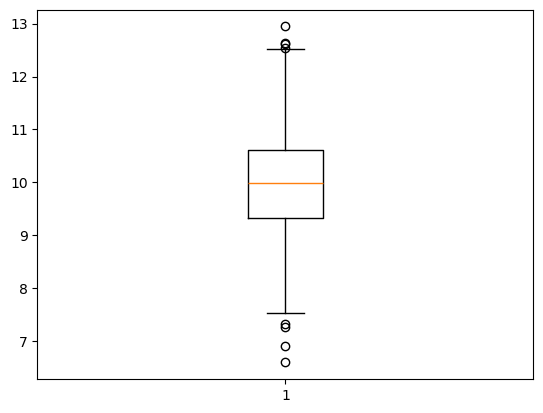

In [2]:
media = 10
varianza = 1

recompensa = np.random.normal(media, varianza, 1000)

plt.boxplot(recompensa);

In [3]:
num_arms = 10 

arms_params = {i: (np.random.randint(low=-10, high=10), np.random.randint(low=3, high=10)) for i in range(num_arms) }

In [4]:
arms_params

{0: (-2, 3),
 1: (4, 9),
 2: (0, 6),
 3: (0, 8),
 4: (8, 3),
 5: (7, 4),
 6: (-1, 6),
 7: (-7, 8),
 8: (-8, 5),
 9: (-1, 3)}

In [5]:
arms_params[4]=(8.5,4)

In [6]:
arms_params

{0: (-2, 3),
 1: (4, 9),
 2: (0, 6),
 3: (0, 8),
 4: (8.5, 4),
 5: (7, 4),
 6: (-1, 6),
 7: (-7, 8),
 8: (-8, 5),
 9: (-1, 3)}

In [7]:
size_sample = 10000
data = [
    np.random.normal(arm_params[0], arm_params[1], size=size_sample) for arm_params in arms_params.values()
]

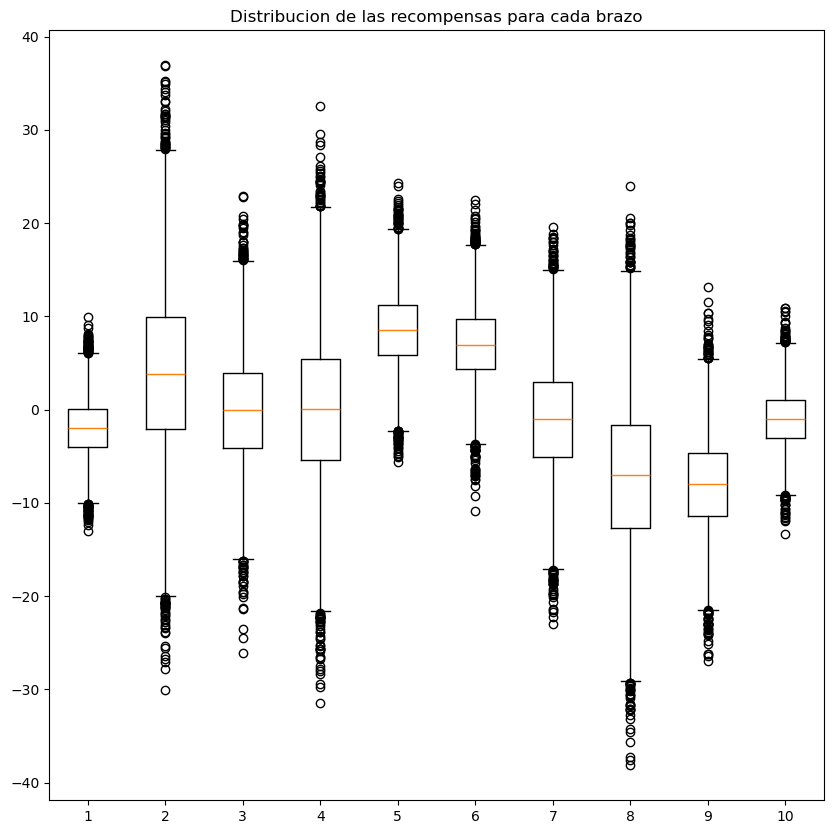

In [8]:
plt.figure(figsize=(10, 10))
plt.boxplot(data);
plt.title('Distribucion de las recompensas para cada brazo');

## Haciendo la solución solo con código funcional

<center> 
<img src="https://i.stack.imgur.com/sOsXd.png" width = "700"/>
</center>

In [9]:
def simple_bandit_algorithm(num_arms, arms_params, epsilon, steps):
    #Lo que queremos guardar 
    hist_rewards = np.zeros(steps)
    hist_actions = np.zeros(steps)

    # Inicio el algoritmo 

    Q = np.zeros(num_arms)
    N = np.zeros(num_arms)

    #Iterar
    for i in range(steps):
        # Explore with probability epsilon
        explore = np.random.choice([True, False], p=[epsilon, 1 - epsilon])
        if explore:
            a = np.random.randint(low=0, high=num_arms)
        else:
            a = np.argmax(Q) 

        arm_params = arms_params[a]

        #Recompensa 
        r = np.random.normal(arm_params[0], arm_params[1])

        #Actualizar valores 
        N[a] += 1
        Q[a] += (1/N[a])*(r-Q[a])

        hist_actions[i] = a
        hist_rewards[i] = r

    return hist_actions,hist_rewards     



In [10]:
hist_actions,hist_rewards = simple_bandit_algorithm(10,arms_params,0.1,10)

In [11]:
hist_actions

array([0., 1., 2., 2., 2., 2., 2., 2., 2., 2.])

In [12]:
hist_rewards.cumsum()/(np.arange(len(hist_rewards))+1)

array([-7.89145125, -5.66774053, -2.94028264, -0.63301029, -0.55310707,
       -0.16742963, -0.12532081,  1.02076889,  1.00604285,  0.98151091])

In [13]:
np.arange(len(hist_rewards))+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
arms_params.values()

dict_values([(-2, 3), (4, 9), (0, 6), (0, 8), (8.5, 4), (7, 4), (-1, 6), (-7, 8), (-8, 5), (-1, 3)])

In [15]:
list(map(lambda x:x[0],arms_params.values()))

[-2, 4, 0, 0, 8.5, 7, -1, -7, -8, -1]

In [16]:
np.array(list(map(lambda x:x[0],arms_params.values()))).argmax()

4

### Analsis de epsilon

In [17]:
epsilon_rewards = {}
epsilon_actions = {}

for epsilon in [0.01,0.1,0.5,0.3, 0.9]:
    hist_actions, hist_rewards = simple_bandit_algorithm(num_arms, arms_params, epsilon, 1000)

    average_reward = np.divide(hist_rewards.cumsum(), np.arange(len(hist_rewards))+1)
    epsilon_rewards[epsilon] = average_reward

    optimal_action = np.array(list(map(lambda x:x[0],arms_params.values()))).argmax()
    optimal_action_per = np.divide((hist_actions == optimal_action).cumsum(), np.arange(len(hist_rewards)) + 1 )
    epsilon_actions[epsilon] = optimal_action_per




<Axes: >

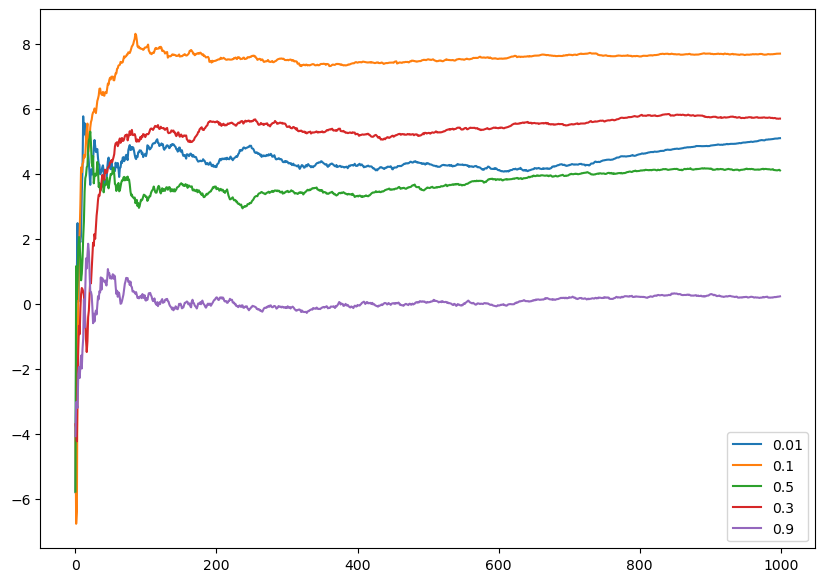

In [18]:
pd.DataFrame(epsilon_rewards).plot(figsize=(10, 7))

<Axes: >

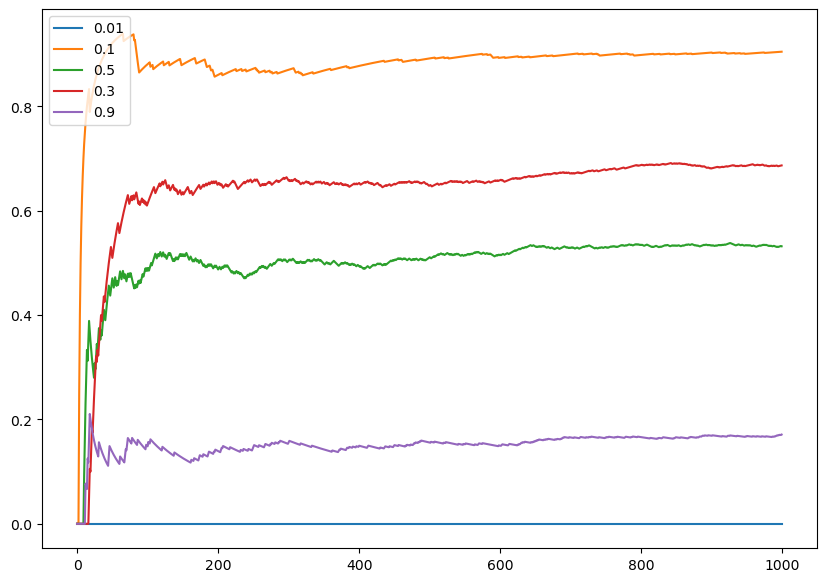

In [19]:
pd.DataFrame(epsilon_actions).plot(figsize=(10, 7))

In [20]:
pd.DataFrame(epsilon_actions).tail()

,0.01,0.10,0.50,0.30,0.90
995,0.0,0.904618,0.531124,0.685743,0.169679
996,0.0,0.904714,0.531595,0.686058,0.170512
997,0.0,0.904810,0.532064,0.686373,0.170341
998,0.0,0.904905,0.532533,0.686687,0.170170
999,0.0,0.905000,0.532000,0.687000,0.171000
